In [519]:
import pandas as pd
import numpy as np

In [520]:
gwq_df = pd.read_csv('District-Level_GWQ_AllYears.xlsx - District-Level_GWQ_AllYears.csv')

In [521]:
gwq_df.head()
# data summary
gwq_df.describe()

,year,arsenic,carbonate,calcium,chloride,electricalconductivity,fluorine,iron,hydrogencarbonate,potassium,...,percentageofsodium,phosphateion,residualsodiumcarbonate,sodiumabsorptionratio,sulfate,silicondioxide,hardnesstotal,alkalinitytotal,totaldissolvedsolids,potentialofhydrogen
count,11708.000000,412.000000,6421.000000,7404.000000,7808.000000,8688.000000,7992.000000,2996.000000,7417.000000,7059.000000,...,37.000000,754.000000,5608.000000,6612.000000,6721.000000,862.000000,7499.000000,5136.000000,1031.000000,8159.000000
mean,2008.966177,0.450150,6.789069,62.342948,196.564750,1236.008242,0.720728,0.756827,289.337065,15.545280,...,27.560429,0.165848,1.851500,3.038957,96.900680,15.683080,328.244245,236.622806,528.000689,7.883530
std,5.474266,2.880222,15.155054,40.564364,242.701235,984.646657,0.695551,1.266965,137.131625,23.987442,...,5.334340,0.444909,10.043287,3.084676,134.743499,16.462699,215.884221,131.155840,847.139705,2.648122
min,2000.000000,0.000000,0.000000,0.000000,1.566667,31.000000,0.000000,0.000000,0.000000,0.000000,...,18.403030,0.000000,-220.609950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000
25%,2004.000000,0.000000,0.000000,35.536198,56.937221,599.111865,0.348237,0.120000,195.388890,3.500000,...,23.048485,0.000000,0.000000,1.109875,24.533333,0.000000,195.982140,147.896305,0.000000,7.610000
50%,2009.000000,0.000000,0.000000,55.200001,116.360000,986.558440,0.575000,0.406591,286.733340,7.460000,...,26.954054,0.024942,1.474000,2.003333,52.923077,16.934035,295.375000,239.214565,307.000000,7.872857
75%,2014.000000,0.000000,6.500000,80.690695,247.674485,1590.933925,0.906409,0.921339,376.899990,17.511904,...,31.383783,0.129875,4.027857,3.905461,117.250000,26.649999,416.833330,323.519477,741.459810,8.085714
max,2018.000000,31.943499,207.000000,573.333310,4971.333500,24340.000000,31.385000,22.000000,1118.333400,405.000000,...,39.800003,4.473000,502.747010,40.099998,4455.333500,265.555540,5966.666500,1017.350000,16307.667000,237.060320


In [522]:
# drop everything except state, district, year, and carbonate
gwq_df = gwq_df[['state', 'district', 'year', 'chloride']]
# gwq_df.columns
gwq_df.describe()


,year,chloride
count,11708.000000,7808.000000
mean,2008.966177,196.564750
std,5.474266,242.701235
min,2000.000000,1.566667
25%,2004.000000,56.937221
50%,2009.000000,116.360000
75%,2014.000000,247.674485
max,2018.000000,4971.333500


In [523]:
# remove missing values
gwq_df = gwq_df.dropna()
 
# rename carbonate to gwq
gwq_df = gwq_df.rename(columns={'carbonate': 'gwq', 'chloride': 'gwq'})

# remove 0 gwq values
gwq_df = gwq_df[gwq_df.gwq != 0]
gwq_df.head()
 


,state,district,year,gwq
0,West Bengal,24 Paraganas North,2000,78.411766
2,West Bengal,24 Paraganas North,2002,98.555557
4,West Bengal,24 Paraganas North,2004,71.666664
5,West Bengal,24 Paraganas North,2005,54.861111
7,West Bengal,24 Paraganas North,2007,134.625000


In [524]:
# merge csv1, csv2, csv3, csv4, csv5
# df1 = pd.read_csv('csv1.csv', delimiter='\t')
# df2 = pd.read_csv('csv2.csv', delimiter='\t')
df3 = pd.read_csv('csv3.csv', delimiter='\t')
df4 = pd.read_csv('csv4.csv', delimiter='\t')
df5 = pd.read_csv('csv5.csv', delimiter='\t')
for df in [df3, df4, df5]:
    # rename jammu & kashmir to jammu and kashmir
    df.rename(columns={'JAMMU & KASHMIR': 'JAMMU AND KASHMIR', 'ORISSA': 'ODISHA',
                       'ANDAMAN & NICOBAR ISLANDS': 'ANDAMAN AND NICOBAR ISLANDS', 
                       'PUDUCHERRY': 'PONDICHERRY'}, inplace=True)

# convert all to integer
df3 = df3.astype(int)
df4 = df4.astype(int)
df5 = df5.astype(int)

# merge all csvs 
sdp_df = pd.concat([df3, df4, df5])
# fix the index
sdp_df = sdp_df.reset_index(drop=True)
sdp_df.to_csv('merged.csv', index=False)
# print(df)
# iterate through rows
# print(df)

states = sdp_df.columns[1:]
to_drop = []
# print(states)
for index, row in sdp_df.iterrows():
    if index == 0: continue
    # if year of current row is same as previous row
    # scale the gwq value of previous rows by ratio of current year to previous year
    # do it statewise
    # print(df)
    if sdp_df.at[index, 'YEAR'] == sdp_df.at[index-1, 'YEAR']:
        # for all states, calcualte the ratio of current year to previous year
        for state in states:
            # calcuatle scalingr facto for sdp
            # print(state)
            # try:
            scaling_factor = sdp_df.at[index, state] / sdp_df.at[index-1, state]

            # except:
                # print(state)
                # print(df.at[index, state], df.at[index - 1, state])
            # scale all previous years by this factor
            for i in range(index):
                sdp_df.at[i, state] = sdp_df.at[i, state] * scaling_factor
        to_drop.append(index-1) 
    else:
        continue

print(to_drop)
# remove duplicate rows
for i in to_drop:
    sdp_df = sdp_df.drop(i)

# lower case all state names
sdp_df.columns = sdp_df.columns.str.lower()

print(sdp_df)
# save merged_scaled
sdp_df.to_csv('merged_scaled.csv', index=False)


[5, 13]
    year  andhra pradesh  arunachal pradesh          assam          bihar  \
0   1999   157959.886804        4408.982245   74436.158103   94978.216920   
1   2000   171093.797983        4732.955556   76319.675896  110615.163705   
2   2001   178851.968773        5489.875020   78289.230921  104271.737830   
3   2002   182923.141861        5227.751159   83032.905362  117457.487552   
4   2003   200843.634004        5796.177059   88141.656708  109883.309241   
6   2004   215455.873790        6544.260887   91169.237161  123786.482493   
7   2005   227457.987826        6735.169376   93915.077351  120702.714178   
8   2006   251348.620024        7098.511339   98156.540557  141592.245427   
9   2007   282693.981436        7950.414810  102351.627857  148922.369770   
10  2008   289919.743968        8603.198675  108448.127364  171625.467283   
11  2009   309550.530900        9317.565924  118440.203101  179835.912215   
12  2010   330210.780438        9719.910696  124268.108811  207295.2

In [525]:
# lowercase all state names
gwq_df['state'] = gwq_df['state'].str.lower()

# rename tamilnadu to tamil nadu
gwq_df['state'] = gwq_df['state'].replace('tamilnadu', 'tamil nadu')

s1 = (sdp_df.columns[1:].unique())
s2 = (gwq_df['state'].unique())

print("We don't have gwq data for these states")
print(set(s1) - set(s2))

print("We don't have sdp data for these states")
print(set(s2) - set(s1))
s = set(s2) - set(s1)
# drop states that are not in sdp
for state in s:
    gwq_df = gwq_df[gwq_df.state != state]

We don't have gwq data for these states
{'manipur', 'mizoram', 'sikkim'}
We don't have sdp data for these states
{'the dadra and nagar haveli and daman and diu'}


In [526]:
print(gwq_df.columns)
print(sdp_df.columns)

# merge the two dataframe
# for each row in gwq_df, find the corresponding row in sdp_df
# add the sdp value to gwq_df

# merged_df = pd.merge(gwq_df, sdp_df, how='inner', left_on=['state', 'year'], right_on=['state', 'year'])

# from sdp_df remove rows with year < 2004 AND state andhra pradesh


gwq_sdp_df = pd.merge(gwq_df, sdp_df, on='year', how='left')
sdp_df = sdp_df.melt(id_vars=['year'], var_name='state', value_name='sdp')
sdp_df = sdp_df[~((sdp_df['year'] < 2004) & ((sdp_df['state'] == 'andhra pradesh') | (sdp_df['state'] == 'telangana')))]

# Merge the DataFrames
gwq_sdp_df = pd.merge(gwq_df, sdp_df, on=['state', 'year'], how='left')
gwq_sdp_df = gwq_sdp_df[~((gwq_sdp_df['year'] < 2004) & ((gwq_sdp_df['state'] == 'andhra pradesh') | (gwq_sdp_df['state'] == 'telangana')))]
print(gwq_sdp_df)
gwq_sdp_df.to_csv('gwq_sdp.csv', index=False)

Index(['state', 'district', 'year', 'gwq'], dtype='object')
Index(['year', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'goa',
       'gujarat', 'haryana', 'himachal pradesh', 'jammu and kashmir',
       'jharkhand', 'karnataka', 'kerala', 'madhya pradesh', 'chhattisgarh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'tripura',
       'uttar pradesh', 'uttarakhand', 'west bengal',
       'andaman and nicobar islands', 'chandigarh', 'delhi', 'pondicherry',
       'telangana'],
      dtype='object')
            state            district  year         gwq           sdp
0     west bengal  24 Paraganas North  2000   78.411766  2.479723e+05
1     west bengal  24 Paraganas North  2002   98.555557  2.751995e+05
2     west bengal  24 Paraganas North  2004   71.666664  3.106867e+05
3     west bengal  24 Paraganas North  2005   54.861111  3.302488e+05
4     west bengal  24 Paraganas North  2007  13

In [527]:
import statsmodels.api as sm
# GWQi,t = β0 + β1SDPi,t + ui,t

X = gwq_sdp_df['sdp']
y = gwq_sdp_df['gwq']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())
R2 = model.rsquared

# betas

predicted_values = model.predict(X)
residuals = y - predicted_values
residuals = residuals.to_numpy()
# print(residuals)
print("Mean of residuals: ", np.mean(residuals))
print("SD of residuals:", np.std(residuals))
print("R2: ", R2)
print(model.params)

# find outlier influence



                            OLS Regression Results                            
Dep. Variable:                    gwq   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     68.09
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.82e-16
Time:                        17:27:30   Log-Likelihood:                -52452.
No. Observations:                7640   AIC:                         1.049e+05
Df Residuals:                    7638   BIC:                         1.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.7262      4.284     38.919      0.0

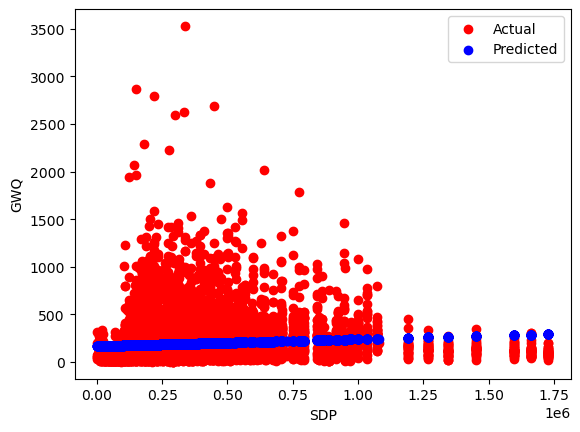

In [528]:
# import statsmodels.api as sm
import matplotlib.pyplot as plt

# plot gwq vs sdp and predicted values
plt.scatter(gwq_sdp_df['sdp'], gwq_sdp_df['gwq'], color='red', label='Actual')
plt.scatter(gwq_sdp_df['sdp'], predicted_values, color='blue', label='Predicted')
plt.xlabel('SDP')
plt.ylabel('GWQ')
plt.legend()
plt.show()


In [529]:
test = model.outlier_test()
print(test)

      student_resid   unadj_p  bonf(p)
0         -0.458429  0.646657      1.0
1         -0.380114  0.703871      1.0
2         -0.507155  0.612061      1.0
3         -0.585736  0.558070      1.0
4         -0.258663  0.795902      1.0
...             ...       ...      ...
7756      -0.738216  0.460406      1.0
7757      -0.520650  0.602626      1.0
7758      -0.803836  0.421516      1.0
7759      -0.877551  0.380215      1.0
7760      -0.758388  0.448242      1.0

[7640 rows x 3 columns]
